In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#ensure all data is displayed
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


#remove warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/london2018_2020.csv')
data.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,NaN
1,NaN,2018-01,City of London Police,City of London Police,-0.114954,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Anti-social behaviour,NaN,NaN
2,NaN,2018-01,City of London Police,City of London Police,-0.114954,51.518632,On or near Brownlow Street,E01000914,Camden 028B,Anti-social behaviour,NaN,NaN
3,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,NaN
4,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,NaN


In [3]:
data1 = pd.read_csv('data/london2021.csv')
data1.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,NaN,2021-01,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
1,NaN,2021-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Anti-social behaviour,NaN,NaN
2,19f06058a3b0aa0e79eabc017b48862f2a6a06645b2f5c...,2021-01,City of London Police,City of London Police,-0.098572,51.516767,On or near King Edward Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN
3,455f0a5e2aa0b0998be8adce21c42e362d85cb5cd0e31a...,2021-01,City of London Police,City of London Police,-0.097334,51.521567,On or near Fann Street,E01000001,City of London 001A,Other theft,Investigation complete; no suspect identified,NaN
4,fe0819e6a82093685a947e32f6b085c727d717244f9e79...,2021-01,City of London Police,City of London Police,-0.097601,51.520699,On or near Carthusian Street,E01000001,City of London 001A,Shoplifting,Status update unavailable,NaN


In [4]:
df_frames = [data,data1]

In [5]:
data = pd.concat(df_frames)

In [6]:
data.tail()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
810418,a4ce0d323fd2eb431c8ef4b51e88fe7cfd2d77b62d1300...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
810419,6d28a027e9145d8240dc8b8a89660576e17402d41f9560...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
810420,1dbe537f3efe052823f5ee0a199002c91ceb9e1da764dc...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN
810421,f008e359543fb3c4cdf88c244e0139ee2b9267839b1360...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Investigation complete; no suspect identified,NaN
810422,36237c5e7a39e6a97d67181c11f479cb86b6ff67a8f7af...,2021-09,Metropolitan Police Service,Metropolitan Police Service,NaN,NaN,No Location,NaN,NaN,Other crime,Under investigation,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4179490 entries, 0 to 810422
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Reported by            object 
 3   Falls within           object 
 4   Longitude              float64
 5   Latitude               float64
 6   Location               object 
 7   LSOA code              object 
 8   LSOA name              object 
 9   Crime type             object 
 10  Last outcome category  object 
 11  Context                float64
dtypes: float64(3), object(9)
memory usage: 414.5+ MB


In [8]:
# convert columns to similar case
data.columns = map(str.lower, data.columns)

### Dealing with Duplicates and Null Values

In [9]:
x = data['crime id'].value_counts().loc[lambda x : x>1]
y = x.count()
y

135514

In [10]:
#x
duplicate_check = data[data['crime id']=='490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a8ee20ed3c3b7319bc3']
duplicate_check

,crime id,month,reported by,falls within,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,context
39462,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39464,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39465,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39466,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39467,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
39528,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39529,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39530,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN
39531,490b595dc6eb4b0a3e1f8d7fa53d2be5460d146d8f133a...,2021-01,Metropolitan Police Service,Metropolitan Police Service,0.182305,51.580061,On or near Shopping Area,E01032741,Havering 013E,Violence and sexual offences,Status update unavailable,NaN


In [11]:
data = data.drop_duplicates(subset=['crime id'])

In [12]:
#confirm no duplicates
x = data['crime id'].value_counts().loc[lambda x : x>1]
y = x.count()
y

0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2893150 entries, 0 to 810422
Data columns (total 12 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   crime id               object 
 1   month                  object 
 2   reported by            object 
 3   falls within           object 
 4   longitude              float64
 5   latitude               float64
 6   location               object 
 7   lsoa code              object 
 8   lsoa name              object 
 9   crime type             object 
 10  last outcome category  object 
 11  context                float64
dtypes: float64(3), object(9)
memory usage: 286.9+ MB


In [14]:
#check for null values in dataset
data.isna().sum()

crime id                       1
month                          0
reported by                    0
falls within                   0
longitude                  40290
latitude                   40290
location                       0
lsoa code                  40290
lsoa name                  40290
crime type                     0
last outcome category          1
context                  2893150
dtype: int64

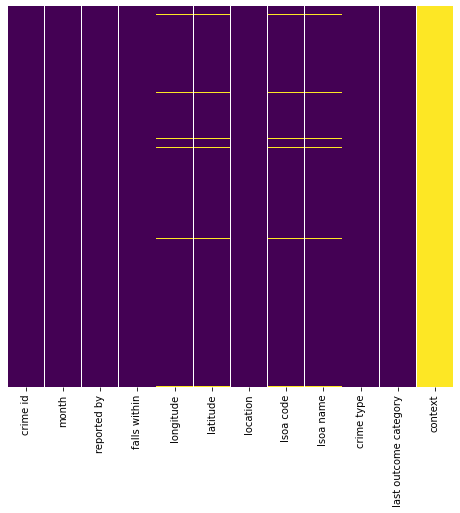

<Figure size 432x288 with 0 Axes>

In [20]:
#visualize the null values
plt.figure(figsize = (8,7))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()
plt.savefig('Missing Values')

In [15]:
# entrie column is null values
data.drop('context', inplace=True, axis=1)

In [16]:
# fill in nulls
data['last outcome category'] = data['last outcome category'].fillna("Other not Known")

In [17]:
# drop remaining nulls that can not be filled in ie lat, long
data.dropna(inplace=True)

In [18]:
# re-check for null values in dataset
data.isna().sum()

crime id                 0
month                    0
reported by              0
falls within             0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
dtype: int64

### Understand the Categorical Columns

In [19]:
#check different location types reported
x = data['location'].value_counts()
y = data['location'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

On or near Supermarket        117224
On or near Parking Area        79376
On or near Shopping Area       78615
On or near Petrol Station      60251
On or near Nightclub           39105
                               ...  
On or near Whitfield Close         1
On or near Scott'S Terrace         1
On or near Lindley Avenue          1
On or near Keywood Drive           1
On or near Hampton Gardens         1
Name: location, Length: 38498, dtype: int64


There are are 38498 categories 


In [20]:
#check different crime types reported
x = data['crime type'].value_counts()
y = data['crime type'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Violence and sexual offences    753668
Vehicle crime                   405158
Other theft                     380292
Burglary                        257147
Criminal damage and arson       194667
Public order                    176405
Drugs                           156675
Theft from the person           149184
Shoplifting                     143400
Robbery                         104713
Bicycle theft                    77911
Other crime                      34284
Possession of weapons            19355
Name: crime type, dtype: int64


There are are 13 categories 


In [21]:
#check different outcome types 
x = data['last outcome category'].value_counts()
y = data['last outcome category'].value_counts().count()

print(x)
print('\n')
print("There are are {} categories ".format(y))

Investigation complete; no suspect identified          1359045
Status update unavailable                              1051266
Under investigation                                     144369
Court result unavailable                                 99531
Local resolution                                         92090
Offender given a caution                                 25739
Offender given penalty notice                            20198
Awaiting court outcome                                   20031
Offender sent to prison                                   6288
Offender given a drugs possession warning                 6051
Offender given community sentence                         5851
Defendant found not guilty                                5066
Offender fined                                            4786
Court case unable to proceed                              3367
Offender given suspended prison sentence                  2546
Unable to prosecute suspect                            

### Categorical Columns Viz

In [22]:
data.columns

Index(['crime id', 'month', 'reported by', 'falls within', 'longitude',
       'latitude', 'location', 'lsoa code', 'lsoa name', 'crime type',
       'last outcome category'],
      dtype='object')

In [23]:
columns_cat = ["reported by", "falls within"]

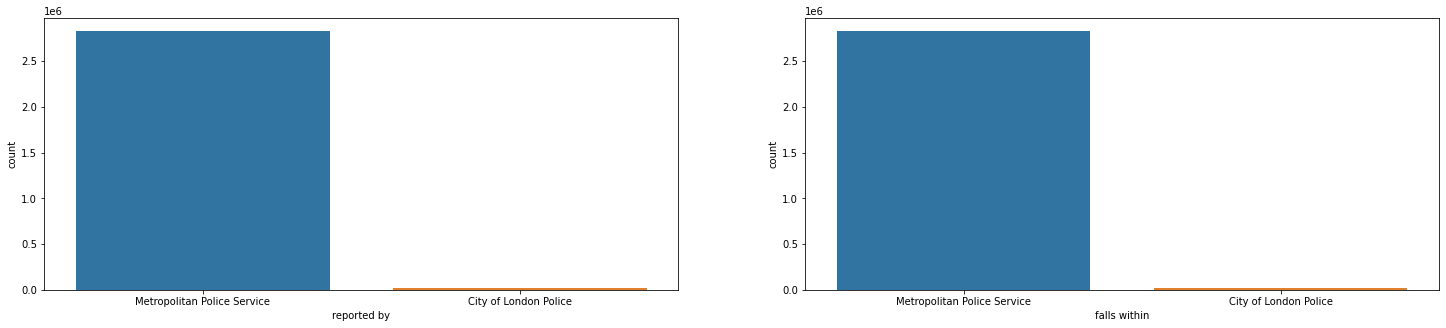

In [24]:
fig, axs = plt.subplots(1, len(columns_cat), figsize=(25,5))
for i, col in enumerate(columns_cat):
    sns.countplot(x=data[col], ax=axs[i], order=data[col].value_counts().index)
plt.show()

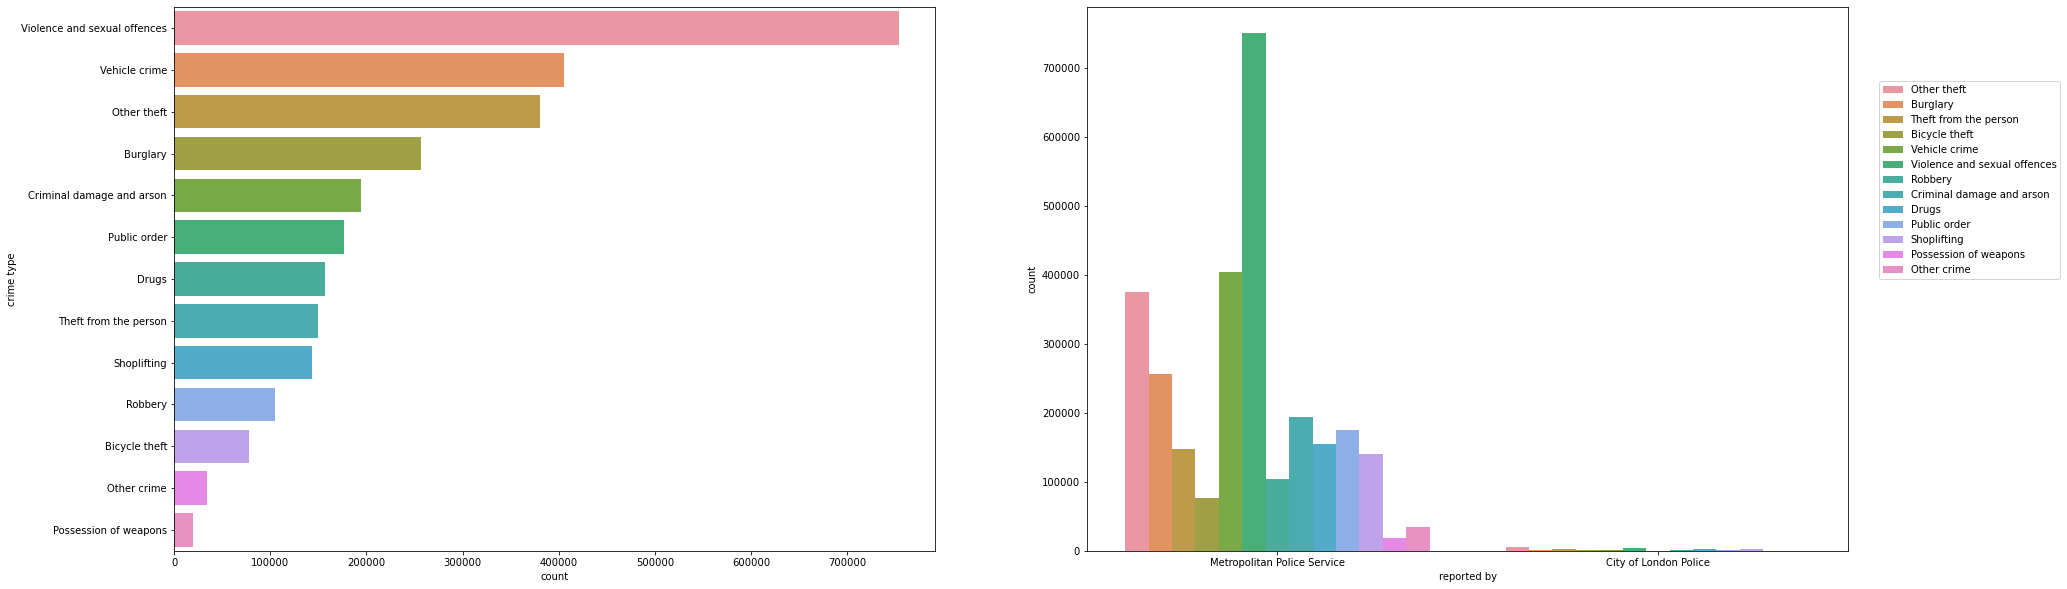

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
#sns.set(font_scale = 2)
sns.countplot(y='crime type', data=data, order=data['crime type'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='crime type', data=data, order = data['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
plt.show()

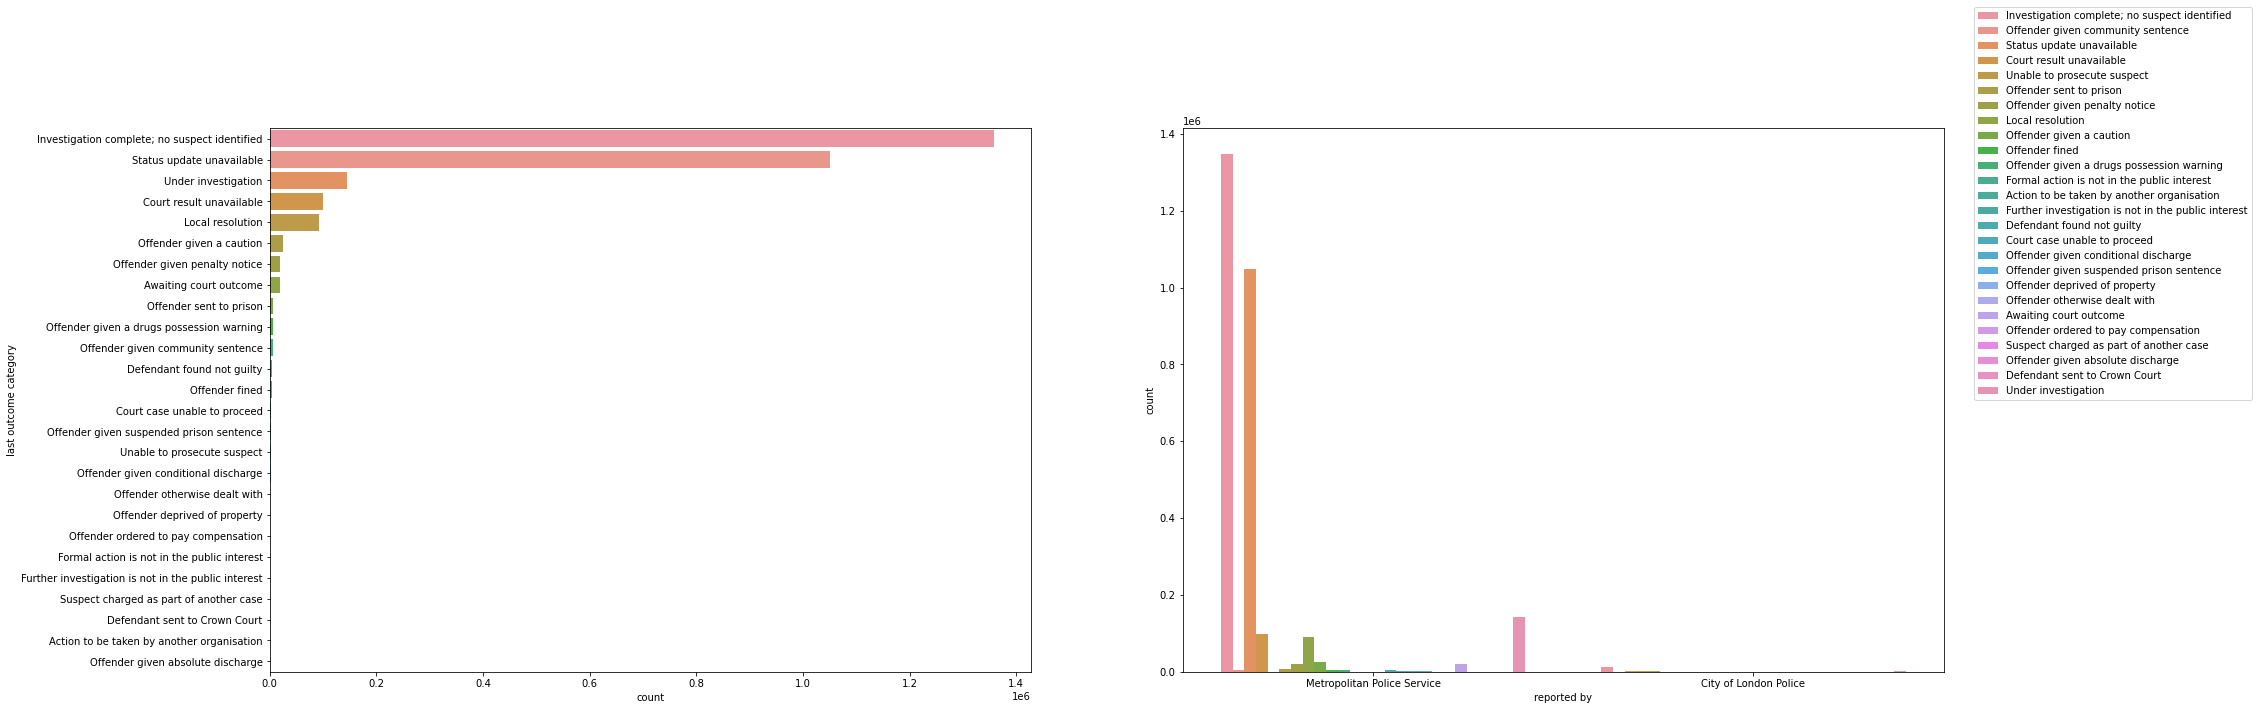

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(30,10))
sns.countplot(y='last outcome category', data=data, order=data['last outcome category'].value_counts().index, ax=axs[0])
m = sns.countplot(x='reported by', hue='last outcome category', data=data, order = data['reported by'].value_counts().index, ax=axs[1] )
m.legend(loc=(1.04,0.5))
plt.show()

In [27]:
# drop column as it is duplicate of 'reported by'
data.drop('falls within', inplace=True, axis=1)

In [28]:
#confirm column has been dropped
data.columns

Index(['crime id', 'month', 'reported by', 'longitude', 'latitude', 'location',
       'lsoa code', 'lsoa name', 'crime type', 'last outcome category'],
      dtype='object')

### Numerical Columns Viz

In [29]:
data.describe()

,longitude,latitude
count,2.852859e+06,2.852859e+06
mean,-1.191196e-01,5.151185e+01
std,1.547450e-01,7.961795e-02
min,-5.669618e+00,5.008352e+01
25%,-1.993480e-01,5.147095e+01
50%,-1.129780e-01,5.151533e+01
75%,-3.106700e-02,5.155429e+01
max,1.756430e+00,5.571940e+01


In [30]:
columns_num = data.describe().columns.tolist()  # numeric variables
columns_num

['longitude', 'latitude']

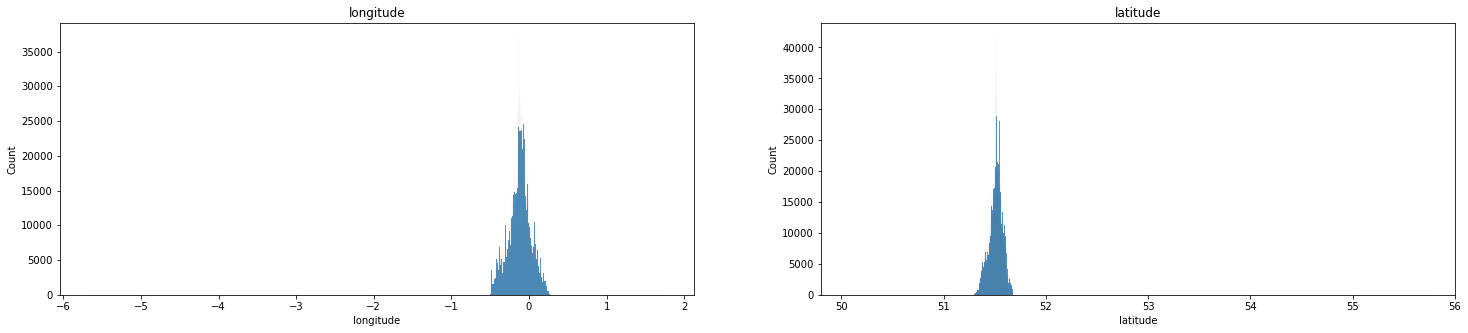

In [31]:
# Histograms
fig, axs = plt.subplots(1, 2, figsize=(25,5))
for i, _ in enumerate(columns_num):
    sns.histplot(data=data[columns_num[i]], ax=axs[i])
    axs[i].set_title(columns_num[i])
plt.show()

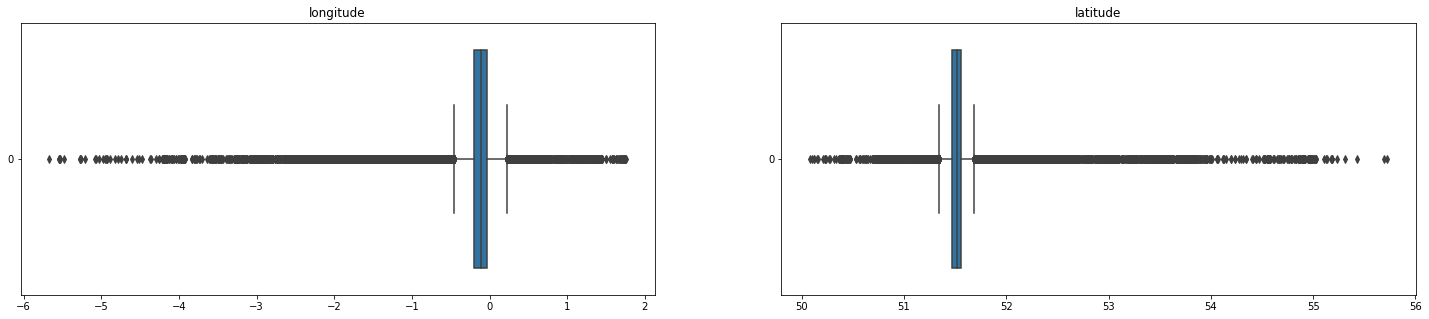

In [32]:
# Boxplots
fig, axs = plt.subplots(1, 2, figsize=(25,5))
for i, _ in enumerate(columns_num):
    sns.boxplot(data=data[columns_num[i]], ax=axs[i], orient="h")
    axs[i].set_title(columns_num[i])
plt.show()

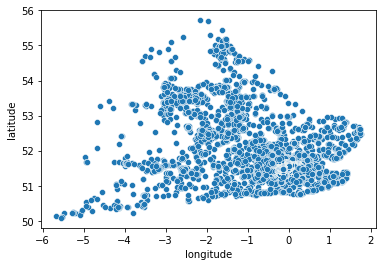

In [33]:
# Lat vs Long scatterplot
sns.scatterplot(data=data, x="longitude", y="latitude")
plt.show()

### Crime type against time

In [34]:
# There is a decrease in crime all crimes drastically after 2020-02 apart from drug usage which spikes up
# Violence and sexual offences eventual rose rapidly and constantly reaching almost it's highest peak over the 3yrs before decreasing 

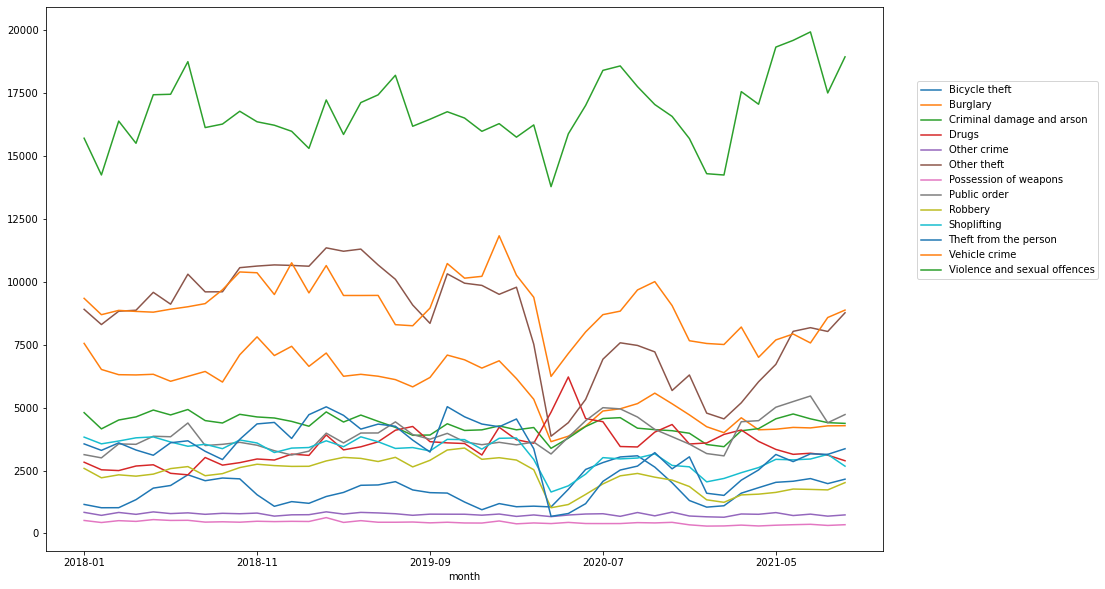

In [35]:
m = data.groupby(['month', 'crime type']).size().unstack().plot.line(figsize=(15, 10))

m.legend(loc=(1.04,0.5))

### Last outcome category against time

In [36]:
# there is an increase in complete investiagtions; no suspect identified and decrease in status update unavailabe

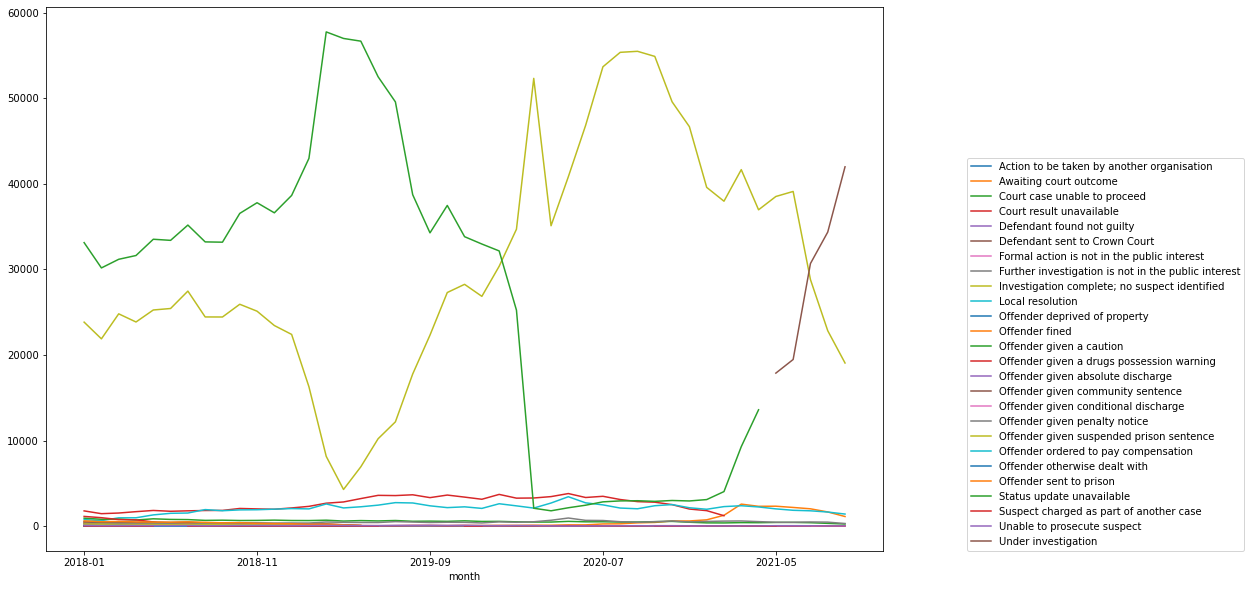

In [37]:
m = data.groupby(['month', 'last outcome category']).size().unstack().plot.line(figsize=(15, 10))
m.legend(loc=(1.1,0))

In [38]:
#create a function to clean the 'LSOA name' column by removing the code
def get_borough(item):
    if not pd.isna(item):
        #print(item, type(item))
        return item[:-5]
    else:
        return item

In [39]:
data['borough_london']=  data['lsoa name'].apply(get_borough)
data

,crime id,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london
0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,Camden
3,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,Camden
4,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden
5,d43d952b5a96b62961bb4ae08460e50e5f572aa2ad639f...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden
6,17a702873711fba20a71fbd278e2ce486349f458ccd531...,2018-01,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,City of London
...,...,...,...,...,...,...,...,...,...,...,...
808452,d49d548c9127dbb79b0b153503bee9e3cbb12baf3135e8...,2021-09,Metropolitan Police Service,-2.738497,52.971779,On or near Sports/Recreation Area,W01000346,Wrexham 018B,Violence and sexual offences,Under investigation,Wrexham
808453,960363b17f573705f1d1a7beaf88d722107e2584e78e97...,2021-09,Metropolitan Police Service,-0.763189,51.631391,On or near West End Road,E01017905,Wycombe 013C,Violence and sexual offences,Under investigation,Wycombe
808455,5c9d5057d94a6565dbb61e0bd9eed82b44bb972b11ff30...,2021-09,Metropolitan Police Service,-0.719917,51.632384,On or near Baring Road,E01017901,Wycombe 014C,Violence and sexual offences,Under investigation,Wycombe
808456,1f66e25fcfeae30f28f7d8a6635a86dc35818282dea24f...,2021-09,Metropolitan Police Service,-0.762112,51.575397,On or near Holland Road,E01017897,Wycombe 023C,Violence and sexual offences,Under investigation,Wycombe


In [40]:
data.shape

(2852859, 11)

In [41]:
data.isna().sum()

crime id                 0
month                    0
reported by              0
longitude                0
latitude                 0
location                 0
lsoa code                0
lsoa name                0
crime type               0
last outcome category    0
borough_london           0
dtype: int64

In [86]:
# saving the dataframe
#data.to_csv('data/cleaned.csv', index=False)

In [87]:
#data = pd.read_csv('data/cleaned.csv')
#data

,Unnamed: 0,crime id,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london
0,0,fb5980f681cc55836191d8537790a1629eb264de22acdf...,2018-01,City of London Police,-0.106453,51.518207,On or near Charterhouse Street,E01000916,Camden 027B,Other theft,Investigation complete; no suspect identified,Camden
1,3,60bf92023cede4382d088f3ef60c6536aac816744bd3cb...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Burglary,Offender given community sentence,Camden
2,4,999497aac964c9cd1450eef9a88872a58b6ef2d09eaa99...,2018-01,City of London Police,-0.111962,51.518494,On or near Nightclub,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden
3,5,d43d952b5a96b62961bb4ae08460e50e5f572aa2ad639f...,2018-01,City of London Police,-0.111497,51.518226,On or near Pedestrian Subway,E01000914,Camden 028B,Theft from the person,Investigation complete; no suspect identified,Camden
4,6,17a702873711fba20a71fbd278e2ce486349f458ccd531...,2018-01,City of London Police,-0.097562,51.518864,On or near Parking Area,E01000001,City of London 001A,Bicycle theft,Investigation complete; no suspect identified,City of London
...,...,...,...,...,...,...,...,...,...,...,...,...
2852854,808452,d49d548c9127dbb79b0b153503bee9e3cbb12baf3135e8...,2021-09,Metropolitan Police Service,-2.738497,52.971779,On or near Sports/Recreation Area,W01000346,Wrexham 018B,Violence and sexual offences,Under investigation,Wrexham
2852855,808453,960363b17f573705f1d1a7beaf88d722107e2584e78e97...,2021-09,Metropolitan Police Service,-0.763189,51.631391,On or near West End Road,E01017905,Wycombe 013C,Violence and sexual offences,Under investigation,Wycombe
2852856,808455,5c9d5057d94a6565dbb61e0bd9eed82b44bb972b11ff30...,2021-09,Metropolitan Police Service,-0.719917,51.632384,On or near Baring Road,E01017901,Wycombe 014C,Violence and sexual offences,Under investigation,Wycombe
2852857,808456,1f66e25fcfeae30f28f7d8a6635a86dc35818282dea24f...,2021-09,Metropolitan Police Service,-0.762112,51.575397,On or near Holland Road,E01017897,Wycombe 023C,Violence and sexual offences,Under investigation,Wycombe


In [46]:
new_df = data.groupby(['month', 'crime type']).size().unstack() #data.groupby("month")['crime type'].value_counts().unstack(fill_value=0)
new_df

crime type,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
month,,,,,,,,,,,,,
2018-01,1155,7554,4802,2832,840,8907,518,3133,2587,3829,3560,9344,15706
2018-02,1023,6518,4157,2531,721,8302,436,3005,2213,3562,3303,8694,14246
2018-03,1025,6310,4509,2500,836,8832,510,3560,2331,3674,3601,8865,16386
2018-04,1344,6300,4633,2681,761,8871,481,3543,2278,3801,3317,8824,15504
2018-05,1803,6326,4905,2730,858,9582,552,3864,2359,3838,3109,8794,17433
2018-06,1907,6048,4711,2391,791,9112,519,3844,2579,3635,3605,8912,17452
2018-07,2333,6243,4926,2331,820,10303,524,4390,2658,3466,3683,9009,18748
2018-08,2097,6438,4486,3019,762,9601,452,3495,2296,3544,3266,9134,16129
2018-09,2204,6017,4390,2716,802,9604,465,3543,2378,3370,2938,9684,16268
